# Exploratory Data Analysis for Crypto Market

## Import packages

In [41]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt


## Read data

In [42]:
filenames = [files for root, dirs, files in os.walk("data/")][0]
df = pd.concat([pd.read_csv(f"data/{file}") for file in filenames]) 

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37082 entries, 0 to 2892
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        37082 non-null  int64  
 1   Name       37082 non-null  object 
 2   Symbol     37082 non-null  object 
 3   Date       37082 non-null  object 
 4   High       37082 non-null  float64
 5   Low        37082 non-null  float64
 6   Open       37082 non-null  float64
 7   Close      37082 non-null  float64
 8   Volume     37082 non-null  float64
 9   Marketcap  37082 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


# Data Wrangle & Cleanup

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['volume_billion'] = df['Volume'] / 1_000_000_000
df['marketcap_billion'] = df['Marketcap'] / 1_000_000_000

In [9]:
partial_df = df[df.Date == df.Date.max()]

In [13]:
partial_df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,volume_billion,marketcap_billion
274,275,Aave,AAVE,2021-07-06 23:59:59,346.714780,307.997525,307.997525,316.898507,9.887055e+08,4.066776e+09,0.988705,4.066776
1441,1442,Binance Coin,BNB,2021-07-06 23:59:59,321.520965,302.195584,302.195584,320.934802,2.203265e+09,4.924196e+10,2.203265,49.241956
2990,2991,Bitcoin,BTC,2021-07-06 23:59:59,35038.536363,33599.916169,33723.509655,34235.193451,2.650126e+10,6.418992e+11,26.501260,641.899162
1373,1374,Cardano,ADA,2021-07-06 23:59:59,1.456887,1.393282,1.404712,1.418053,1.477700e+09,4.530158e+10,1.477700,45.301576
1384,1385,Chainlink,LINK,2021-07-06 23:59:59,20.240997,18.351877,18.351877,20.080466,1.156986e+09,8.775356e+09,1.156986,8.775356
844,845,Cosmos,ATOM,2021-07-06 23:59:59,14.020420,12.823983,13.558099,13.159371,2.537822e+08,2.865093e+09,0.253782,2.865093
934,935,Crypto.com Coin,CRO,2021-07-06 23:59:59,0.124989,0.115725,0.115725,0.122856,1.520764e+08,3.103718e+09,0.152076,3.103718
2759,2760,Dogecoin,DOGE,2021-07-06 23:59:59,0.241910,0.229842,0.231216,0.234422,1.265920e+09,3.055252e+10,1.265920,30.552518
1465,1466,EOS,EOS,2021-07-06 23:59:59,4.004299,3.797596,3.814236,3.882325,6.967875e+08,3.707457e+09,0.696787,3.707457
2159,2160,Ethereum,ETH,2021-07-06 23:59:59,2346.294874,2197.919385,2197.919385,2324.679449,2.089186e+10,2.710286e+11,20.891861,271.028619


<Axes: xlabel='marketcap_billion', ylabel='Name'>

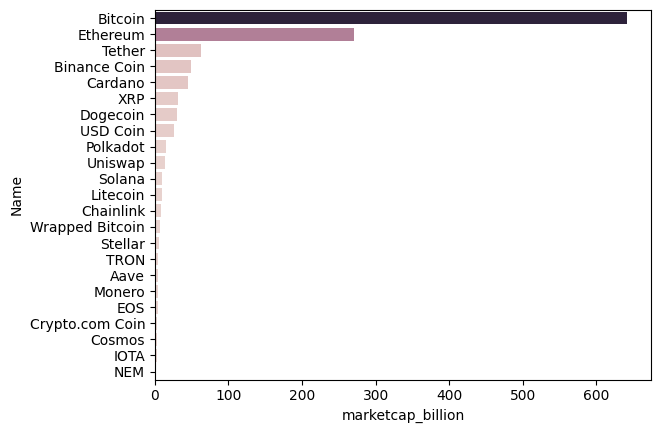

In [15]:
sns.barplot(partial_df.sort_values(by="marketcap_billion", ascending=False), y="Name", x="marketcap_billion", hue="marketcap_billion", legend=False, errorbar=None, )


<Axes: xlabel='volume_billion', ylabel='Name'>

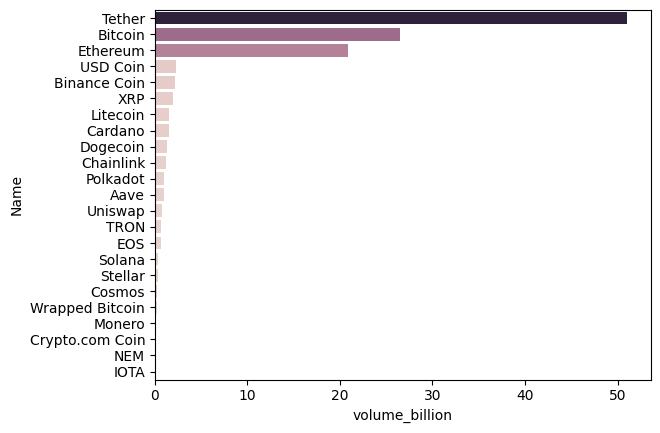

In [16]:
sns.barplot(partial_df.sort_values(by="volume_billion", ascending=False), y="Name", x="volume_billion", hue="volume_billion", legend=False, errorbar=None, )


In [ ]:
df.sort_values(by="volume_billion", ascending=False)

In [35]:
top_5 = df.groupby("Name").max().reset_index().sort_values("marketcap_billion", ascending=False)[:5]

In [38]:
best_5 = top_5["Name"].to_list()

<Axes: xlabel='Date', ylabel='marketcap_billion'>

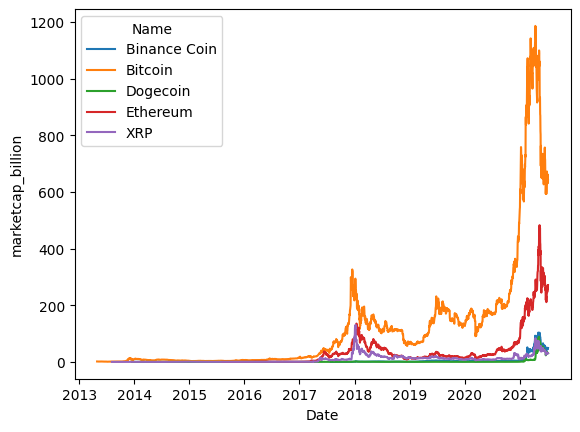

In [39]:
sns.lineplot(data=df[df.Name.isin(best_5)], x="Date", y="marketcap_billion", hue="Name")

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(wide_format[top_5_currency_names].corr(),vmin=0, vmax=1, cmap='coolwarm', annot=True);